## Import Libraries

In [1]:
import numpy as np
from math import sqrt

from pylearn_ml191.linear_regression import LinearRegression
from pylearn_ml191.metrics import rmse

import matplotlib.pyplot as plt
%matplotlib inline 

import warnings 
warnings.filterwarnings("ignore")

##  Data Generator

In [2]:
num_samples_train = (20, 1)    
num_samples_test = (10, 1)   

x_min = 0
x_max = 1
norm_mu = 0
norm_scale = 0.3

In [3]:
# True model
def truth_model(input):
    y = np.sin(2*np.pi*input)
    return y

In [4]:
# Generating x_train from uniform distribution
x_train = np.random.uniform(x_min, x_max, num_samples_train)
x_test = np.random.uniform(x_min, x_max, num_samples_test)

# Generating noise from gaussian distribution 
noise_train = np.random.normal(norm_mu, norm_scale, num_samples_train)
noise_test = np.random.normal(norm_mu, norm_scale, num_samples_test)

# y = true_model(x) + noise 
y_train = truth_model(x_train) + noise_train
y_test = truth_model(x_test) + noise_test

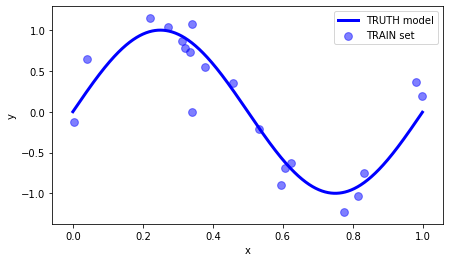

In [5]:
# For plot true model 
step_size = 0.001
x_plot = np.arange(x_min, x_max, step_size)
y_true_plot = truth_model(x_plot)

plt.figure(figsize=(7,4))
plt.scatter(x_train, y_train, s=60, c='blue', alpha=0.5, label='TRAIN set')
# plt.scatter(x_test, y_test, s=50, c='blue', alpha=0.5, label='TEST set')
plt.plot(x_plot, y_true_plot, linewidth=3, c ='blue', label='TRUTH model')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Linear Regression

In [6]:
model = LinearRegression()

## Don't use weight decay

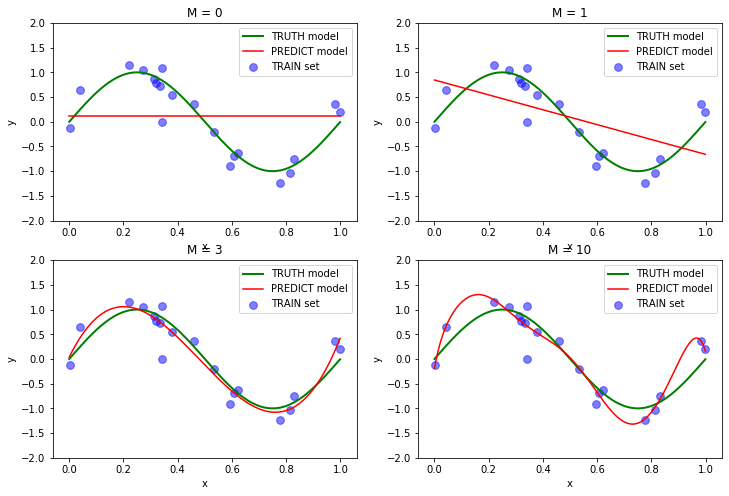

In [7]:
# Don't use weights decay 
M_values = [0, 1, 3, 10]
x_use = np.arange(x_min, x_max, step_size)
x_use = np.reshape(x_use, (x_use.shape[0], 1))

model = LinearRegression()
plt.figure(figsize=(12,8))

for i, m in enumerate(M_values):
    model.fit(x_train, y_train, m, 0) # weight_decay = 0
    y_preds = model.eval(x_use)
    y_truth = truth_model(x_use)
    
    # Visualization 
    plt.subplot(2, 2, i+1)
    plt.scatter(x_train, y_train, s=60, c='blue', marker='o', alpha=0.5, label='TRAIN set')
    plt.plot(x_use, y_truth, linewidth=2, c='green', label="TRUTH model")
    plt.plot(x_use, y_preds, c = 'red', label= "PREDICT model")
    plt.title("M = " + str(m))
    plt.legend()
    plt.ylim(-2, 2)
    plt.xlabel('x')
    plt.ylabel('y')
plt.show()

## Using weight decay

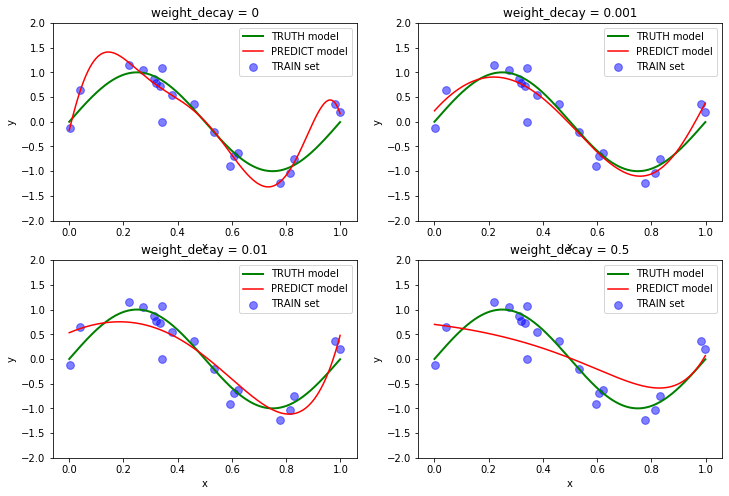

In [8]:
# Don't use weights decay 
M = 9 
weight_decay = [0, 0.001, 0.01, 0.5]
x_use = np.arange(x_min, x_max, step_size)
x_use = np.reshape(x_use, (x_use.shape[0], 1))

model = LinearRegression()
plt.figure(figsize=(12,8))

for i, weight_decay in enumerate(weight_decay):
    model.fit(x_train, y_train, M, weight_decay)
    y_preds = model.eval(x_use)
    y_truth = truth_model(x_use)
    
    # Visualization 
    plt.subplot(2, 2, i+1)
    plt.scatter(x_train, y_train, s=60, c='blue', marker='o', alpha=0.5, label='TRAIN set')
    plt.plot(x_use, y_truth, linewidth=2, c='green', label="TRUTH model")
    plt.plot(x_use, y_preds, c = 'red', label= "PREDICT model")
    plt.title("weight_decay = " + str(weight_decay))
    plt.legend()
    plt.ylim(-2, 2)
    plt.xlabel('x')
    plt.ylabel('y')
plt.show()

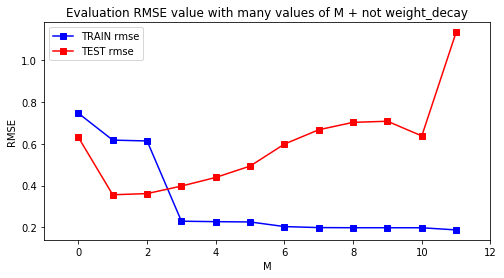

In [9]:
# Don't use l2-regularization 
M_values = range(0, 12)
weight_decay = 0

train_rmse = []
test_rmse = []

for m in M_values:
    model.fit(x_train, y_train, m, weight_decay)
    N = x_train.shape[0]
    y_train_preds = model.eval(x_train)
    y_test_preds = model.eval(x_test)
    train_rmse += [rmse(y_train, y_train_preds)]
    test_rmse += [rmse(y_test, y_test_preds)]
    
plt.figure(figsize=(8, 4))
plt.plot(M_values, train_rmse, '-s',  c = 'blue', label="TRAIN rmse")
plt.plot(M_values, test_rmse, '-s', c = 'red', label="TEST rmse")
plt.xlabel('M')
plt.ylabel('RMSE')
plt.xlim(-1, 12)
plt.legend()
plt.title("Evaluation RMSE value with many values of M + not weight_decay")
plt.show()

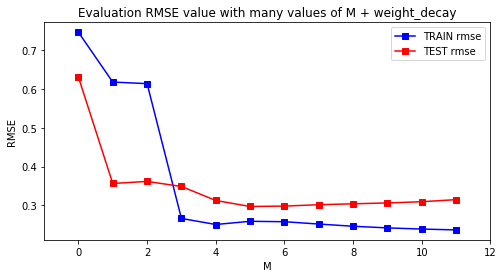

In [10]:
# Use l2-regularization 

M_values = range(0, 12)
weight_decay = 0.001

train_rmse = []
test_rmse = []

for m in M_values:
    model.fit(x_train, y_train, m, weight_decay)
    N = x_train.shape[0]
    y_train_preds = model.eval(x_train)
    y_test_preds = model.eval(x_test)
    train_rmse += [rmse(y_train, y_train_preds)]
    test_rmse += [rmse(y_test, y_test_preds)]
    
plt.figure(figsize=(8, 4))
plt.plot(M_values, train_rmse, '-s', c = 'blue', label="TRAIN rmse")
plt.plot(M_values, test_rmse, '-s', c = 'red', label="TEST rmse")
plt.xlabel('M')
plt.ylabel('RMSE')
plt.xlim(-1, 12)
plt.legend()
plt.title("Evaluation RMSE value with many values of M + weight_decay")
plt.show()